# Data exploration

### 0 Data ingestion

Saving a csv with all the data

In [4]:
import urllib.request

# URL del archivo CSV que deseas descargar
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'

# Nombre local del archivo donde se guardará el contenido descargado
archivo_local = '../data/raw/bank-marketing-campaign-data.csv'

# Realiza la solicitud HTTP y guarda el contenido en el archivo local
try:
    urllib.request.urlretrieve(url, archivo_local)
    print(f'El archivo CSV ha sido descargado exitosamente como {archivo_local}')
except Exception as e:
    print(f'Error al descargar el archivo: {e}')

El archivo CSV ha sido descargado exitosamente como ../data/raw/bank-marketing-campaign-data.csv


Save the csv in a dataframe

In [5]:
import pandas as pd

# URL del archivo CSV que quieres descargar

ruta_csv = '../data/raw/bank-marketing-campaign-data.csv'

# Descargar el CSV y guardarlo localmente
df = pd.read_csv(ruta_csv,sep=';')

df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


We are dealing with a dataset related to banking marketing campaigns and the customer's response in terms of whether they subscribe to a long-term deposit or not.

We will use this data to train a logistic regression model to provide us with predictions.

### 1 Columns Explained

- age. Age of customer (numeric)
- job. Type of job (categorical)
- marital. Marital status (categorical)
- education. Level of education (categorical)
- default. do you currently have credit (categorical) 6. housing.
- housing. do you have a housing loan (categorical) 7. loan.
- loan. Do you have a personal loan? (categorical)
- contact. Type of contact communication (categorical)
- month. Last month in which you have been contacted (categorical)
- day_of_week. Last day on which you have been contacted (categorical)
- duration. Duration of previous contact in seconds (numeric)
- campaign. Number of contacts made during this campaign to the customer (numeric)
- pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
- previous. Number of contacts made during the previous campaign to the customer (numeric)
- poutcome. Result of the previous marketing campaign (categorical).
- emp.var.rate. Employment variation rate. Quarterly indicator (numeric)
- cons.price.idx. Consumer price index. Monthly indicator (numeric)
- cons.conf.idx. Consumer confidence index. Monthly indicator (numeric)
- euribor3m. EURIBOR 3-month rate. Daily indicator (numeric)
- nr.employed. Number of employees. Quarterly indicator (numeric)
- y. TARGET. Whether the customer takes out a long-term deposit or not


## 2 Exploratory Data Analysis

We do not have missing data in any of the columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

statistical description

In [7]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


number of rows and columns

In [8]:
print(f'Filas: {df.shape[0]}, Columnas : {df.shape[1]}')

Filas: 41188, Columnas : 21


name of columns

In [9]:
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


unique values in each column

In [10]:
print(df.nunique())

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


unique values per column

In [11]:
#Valores unicos por columna

numero_minimo = 10

for columna in df.columns:
    # Verifica si la columna tiene menos de 10 valores únicos
    if df[columna].nunique() < numero_minimo:
        # Imprime los valores únicos de la columna 'neighbourhood_group'
        print(f"Valores únicos de {columna}: {df[columna].unique()}")

Valores únicos de marital: ['married' 'single' 'divorced' 'unknown']
Valores únicos de education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Valores únicos de default: ['no' 'unknown' 'yes']
Valores únicos de housing: ['no' 'yes' 'unknown']
Valores únicos de loan: ['no' 'yes' 'unknown']
Valores únicos de contact: ['telephone' 'cellular']
Valores únicos de day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
Valores únicos de previous: [0 1 2 3 4 5 6 7]
Valores únicos de poutcome: ['nonexistent' 'failure' 'success']
Valores únicos de y: ['no' 'yes']


In [12]:
# Configura Pandas para mostrar DataFrames completos sin truncar
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

we copy the dataframe to avoid being destructive.

In [13]:
clean_df = df.copy()

In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3 Analysis of a variable


We separate the dataset into categorical and numerical variables to conduct more detailed analyses.

categorical variables

In [15]:
categoricas = clean_df.select_dtypes(include='object')


In [16]:
categoricas

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


We graph the categorical variables.

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


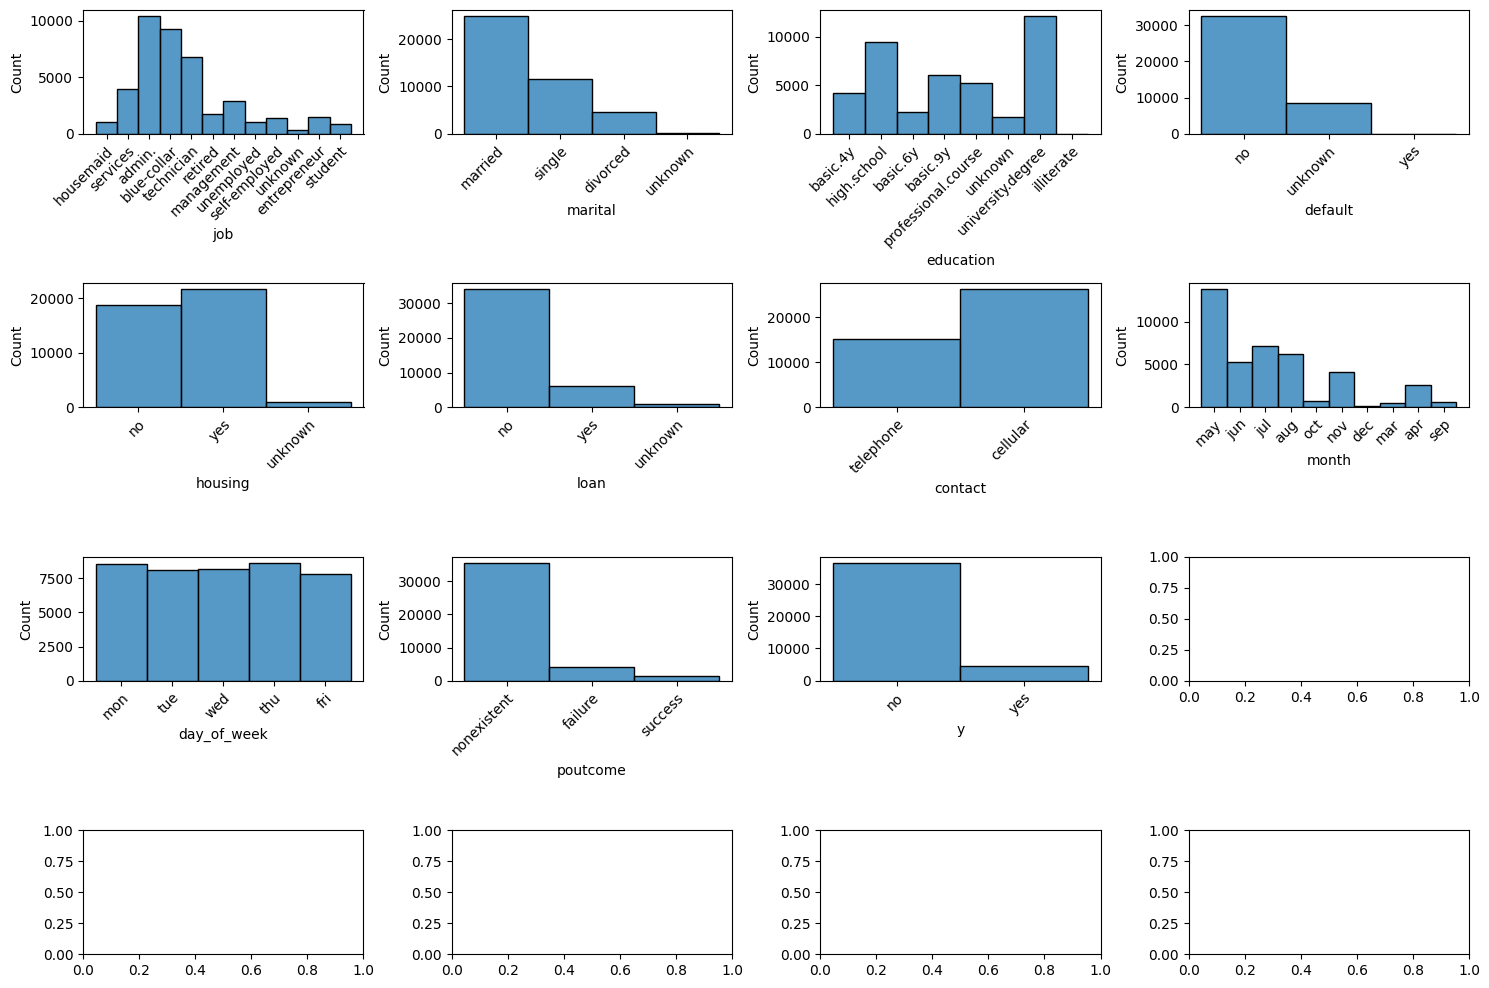

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

n_filas = 4
n_columnas = 4


# Configuración del diseño de los subgráficos
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(15, 10))

columns_to_plot = categoricas.columns
print(columns_to_plot)

# Iterar sobre las columnas y crear los boxplots
for i, column in enumerate(columns_to_plot):

    sns.histplot(ax=axes[i // n_filas, i % n_columnas], data=clean_df, x=column)
    plt.setp(axes[i // n_filas, i % n_columnas].get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor") # Rotates the tags


plt.tight_layout()

plt.show()


Following this graph, we can conclude that:

- The majority of respondents did NOT apply for a long-term deposit.
- The majority of respondents are married.
- The majority of respondents do NOT have current credit (default column).
- Nor do they have any personal loans (loan column).
- We take a look at the poutcome graph, which indicates a small portion of success outcomes.

numerical variables

In [18]:
numericas = clean_df.select_dtypes(include='number')

In [19]:
numericas

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [20]:

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

def plot_numerical_data(dataframe):

    total_data = dataframe

    for column in dataframe.columns:

        fig, axis = plt.subplots(2, 1, figsize = (8,4), gridspec_kw={'height_ratios': [6, 1]})

        # Calcula la media de los datos
        media = np.mean(dataframe[column])
        mediana = np.median(dataframe[column])
        desviacion_estandar = np.std(dataframe[column])

        # Crear una figura múltiple con histogramas y diagramas de caja
        sns.histplot(ax = axis[0],
                     bins= 100,
                    data = total_data,
                    kde=True,
                    x = column).set(xlabel = None)
        axis[0].axvline(media, color='red', linestyle='dashed', linewidth=1, label='Media')
        axis[0].axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label='Mediana')
        axis[0].axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=1, label='Desviación Estándar')
        axis[0].axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=1)

        sns.boxplot(ax = axis[1], data = total_data, x = column).set(xlabel = None)
        axis[1].axvline(media, color='red', linestyle='dashed', linewidth=1, label='Media')
        axis[1].axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label='Mediana')
        axis[1].axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=1)
        axis[1].axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=1)

        axis[0].legend()

        fig.suptitle(column)

        # Ajustar el layout
        plt.tight_layout()

        # Mostrar el plot
        plt.show()

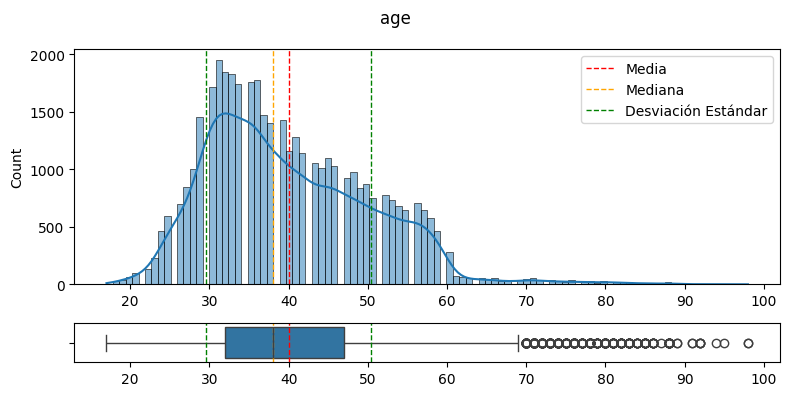

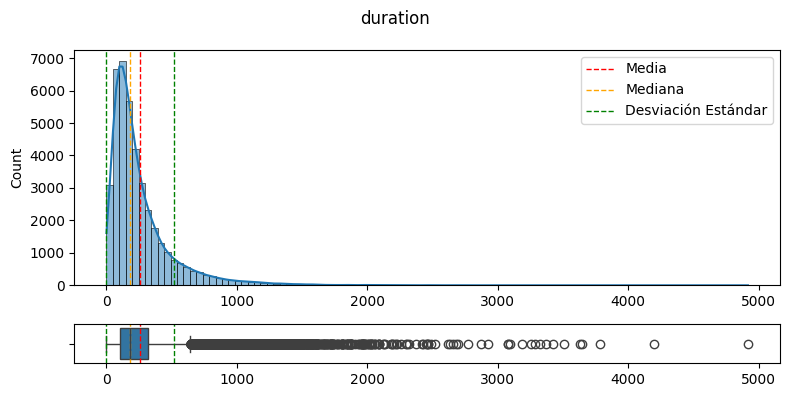

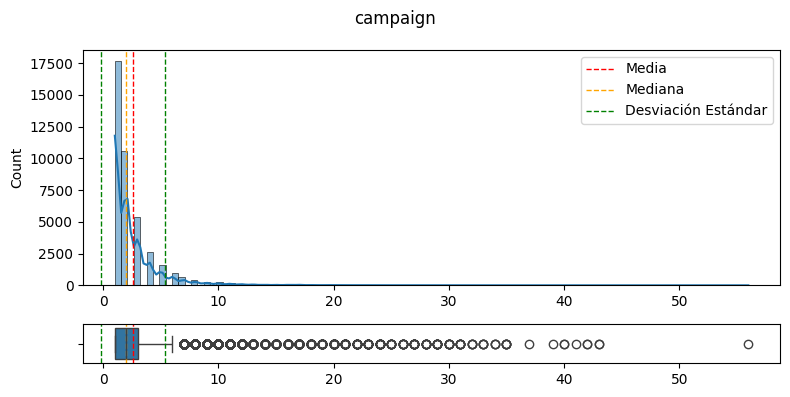

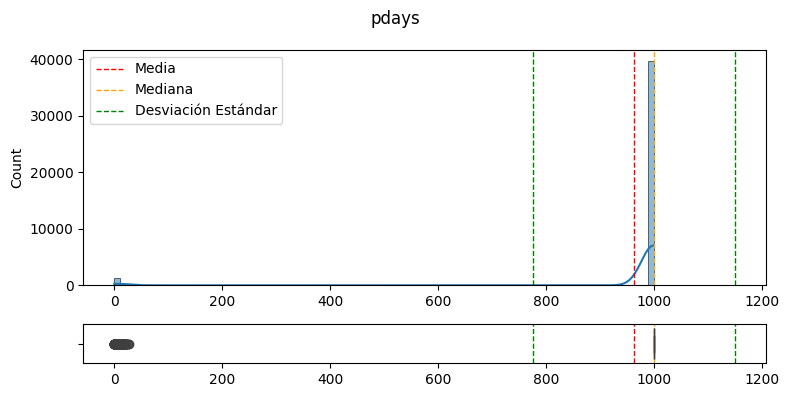

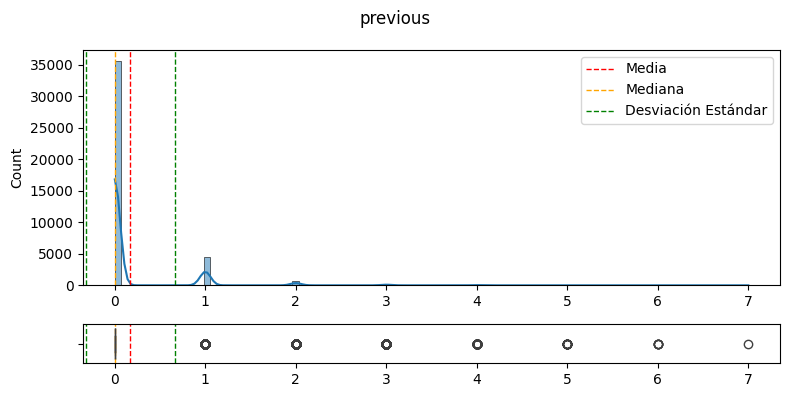

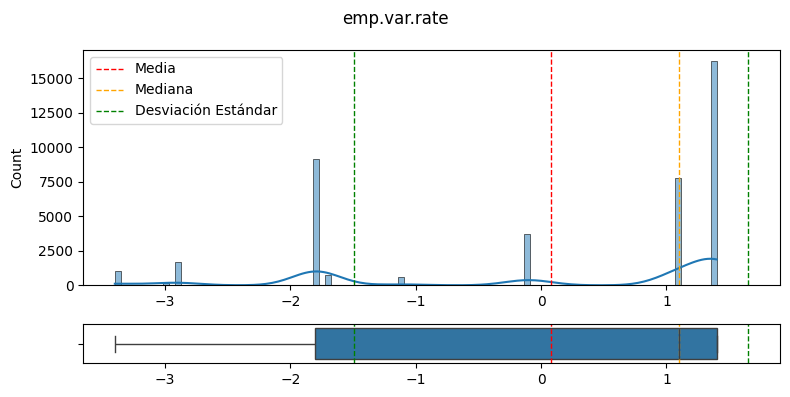

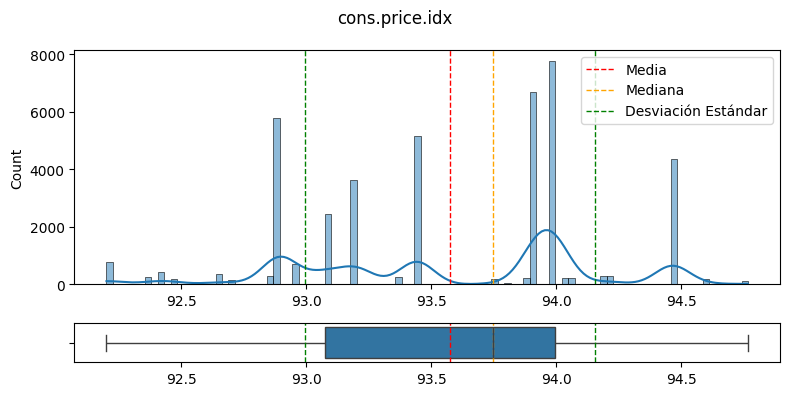

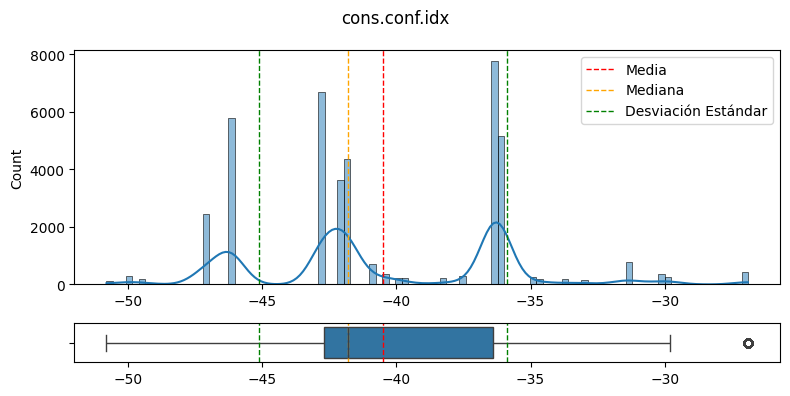

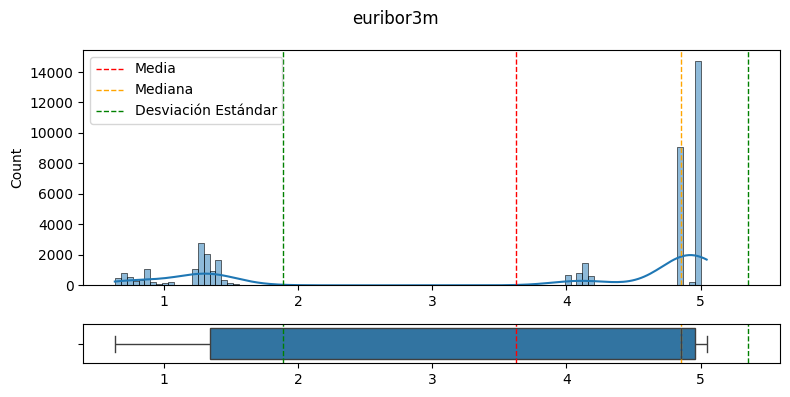

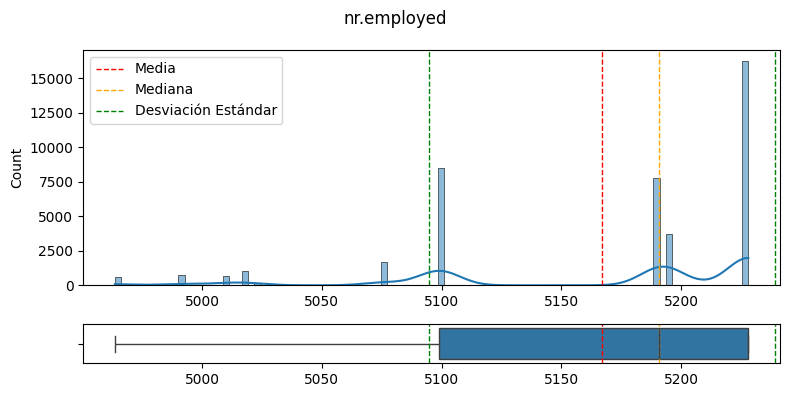

In [21]:
plot_numerical_data(numericas)

Points to consider:
- The surveyed individuals have an average age of 40 years, with the age peak ranging from 30 to 40.
- The average duration in seconds of the last contact with the person was 4 minutes.
- In the pdays column, there is a peak at 999, suggesting that it has been a long time since they were last contacted, and the data were formatted with that code.
- In the emp.var.rate column, we have an economic indicator measuring the change in the employment level at the time of the survey, with scattered data ranging from -1 to 1.
- We have data on the Consumer Price Index, Consumer Confidence Index, and Euribor at the time of the survey.

## 4 Multivariable analysis.

In [22]:
categoricas.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

categorical - categorical

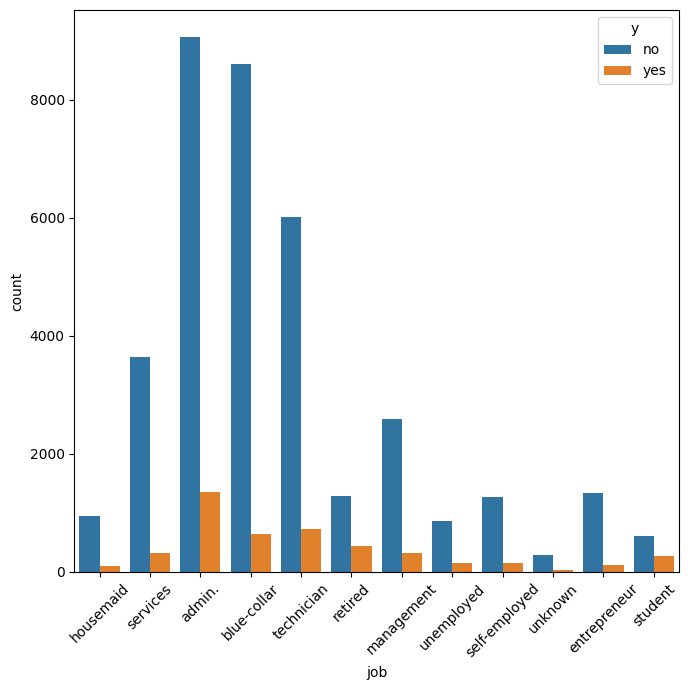

In [23]:
fig, axis = plt.subplot_mosaic([['c']], figsize = (7, 7))

dataframe = df
x_1 = "job"
hue_1 = "y"

sns.countplot(data = dataframe, x = x_1, hue = hue_1, ax = axis['c'])

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

I factorize the categorical variables to work better.

In [24]:
for c in categoricas:

    clean_df[f'{c}_n'] = pd.factorize(clean_df[c])[0]


In [25]:
all_numericas = clean_df.select_dtypes(include='number')

In [26]:
all_numericas.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_n',
       'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y_n'],
      dtype='object')

<Axes: label='a2'>

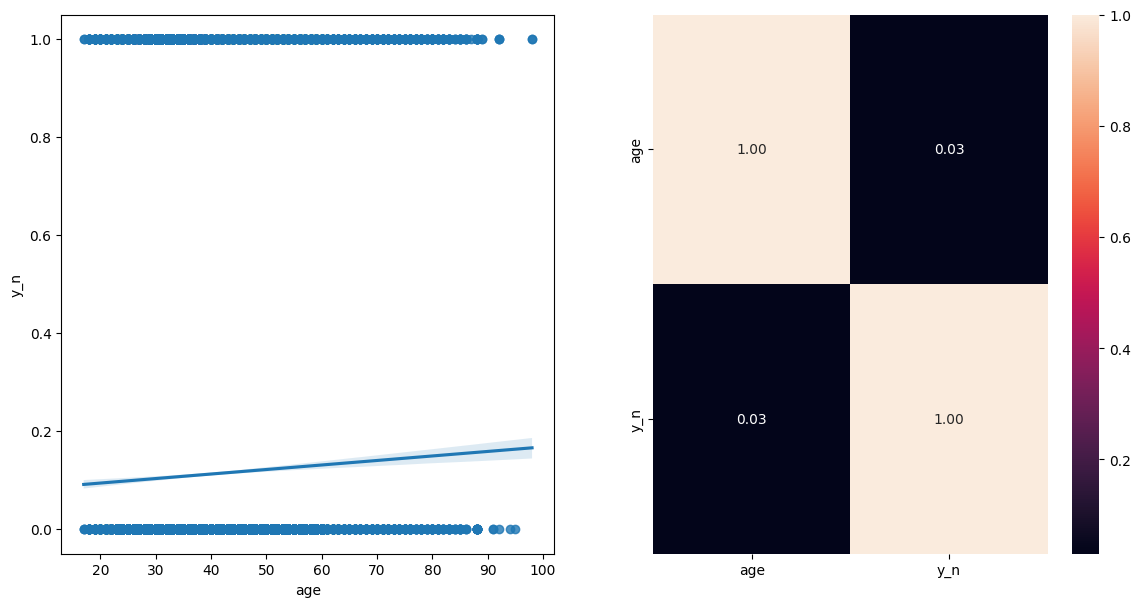

In [27]:
fig, axis = plt.subplot_mosaic([['a1','a2']], figsize = (14, 7))

data = all_numericas
x_1 = 'age'
y_1 = 'y_n'

sns.regplot(ax = axis['a1'], data = data, x = x_1, y = y_1)
sns.heatmap(data[[x_1, y_1]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])


<Axes: label='a2'>

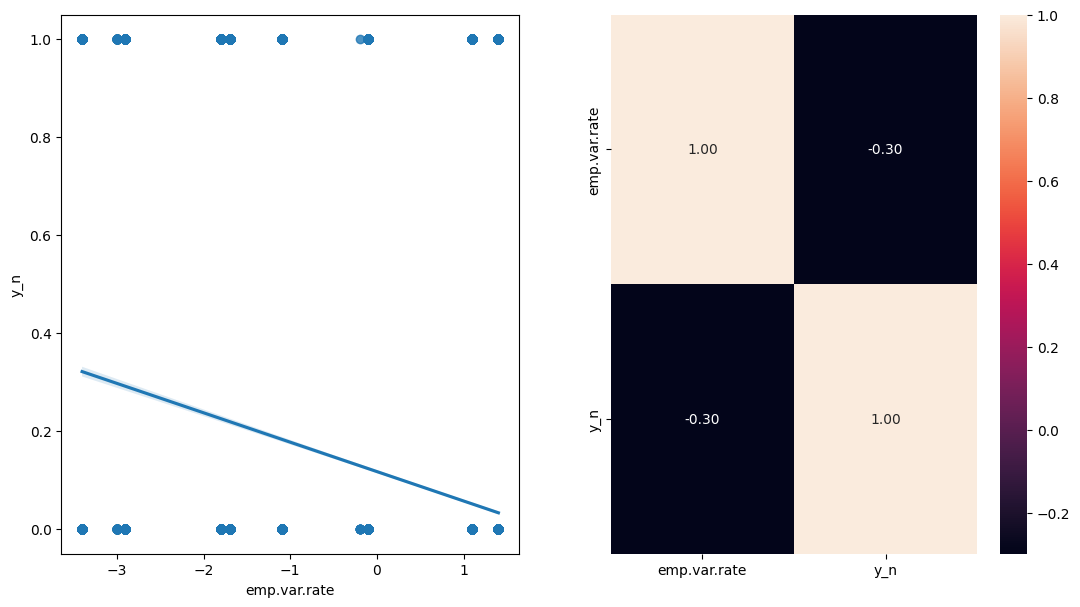

In [28]:
fig, axis = plt.subplot_mosaic([['a1','a2']], figsize = (13, 7))

data = all_numericas
x_1 = 'emp.var.rate'
y_1 = 'y_n'

sns.regplot(ax = axis['a1'], data = data, x = x_1, y = y_1)
sns.heatmap(data[[x_1, y_1]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])


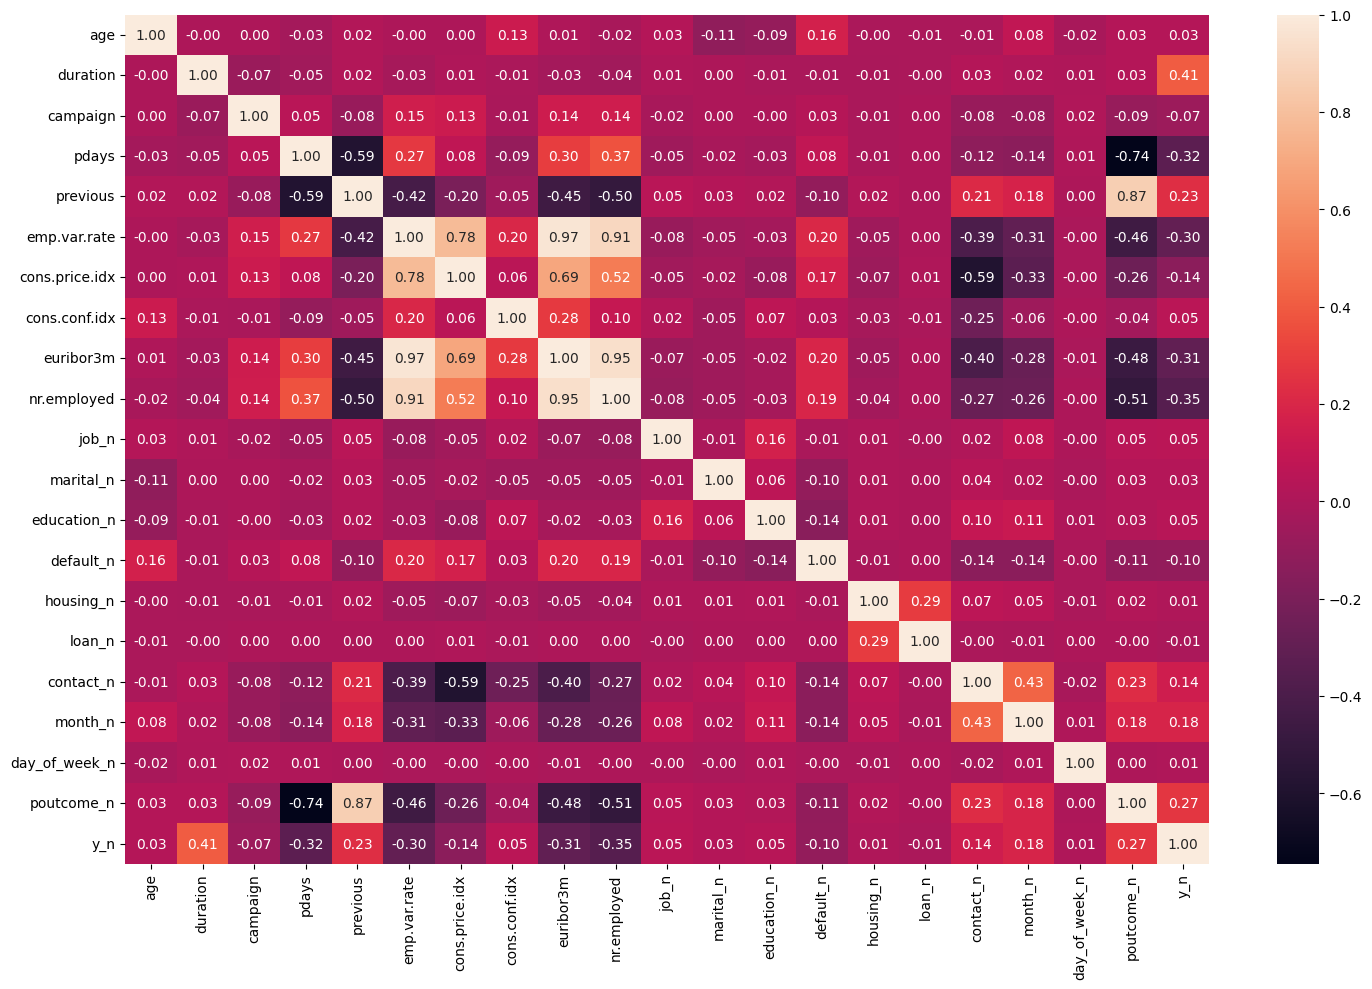

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap((all_numericas.corr()), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

<Axes: label='a2'>

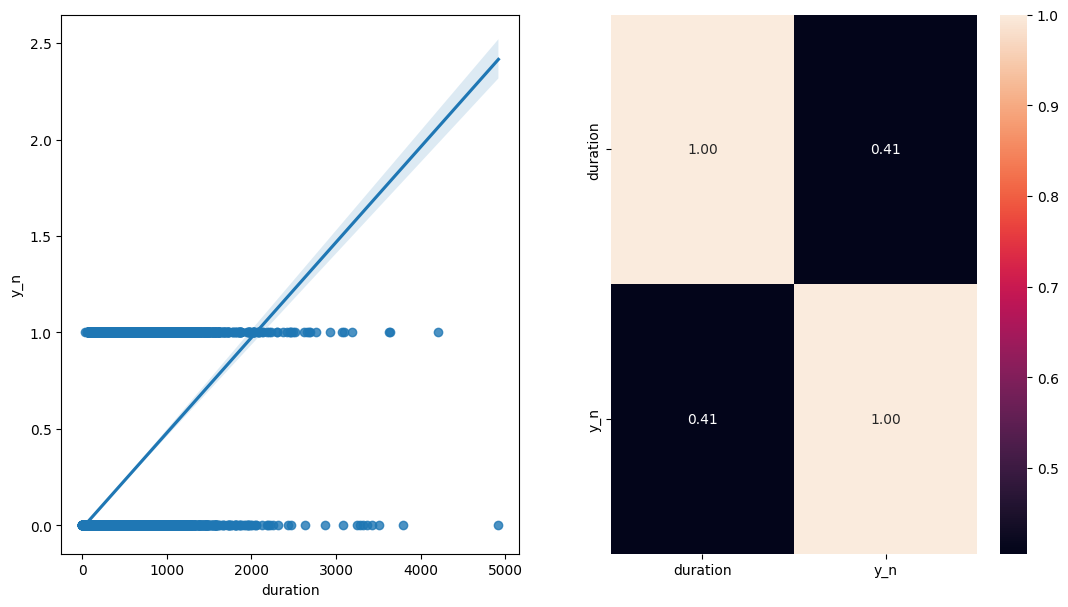

In [30]:
fig, axis = plt.subplot_mosaic([['a1','a2']], figsize = (13, 7))

data = all_numericas
x_1 = 'duration'
y_1 = 'y_n'

sns.regplot(ax = axis['a1'], data = data, x = x_1, y = y_1)
sns.heatmap(data[[x_1, y_1]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])


In [31]:
numericas['duration'].mean()

258.2850101971448

The average duration of the last call was about 4 minutes.

Given that this column is the most influential in the target, it is reasonable to assume that customers who spent more time talking to the representatives were somehow "convinced" to take a long-term loan.

<Axes: label='a2'>

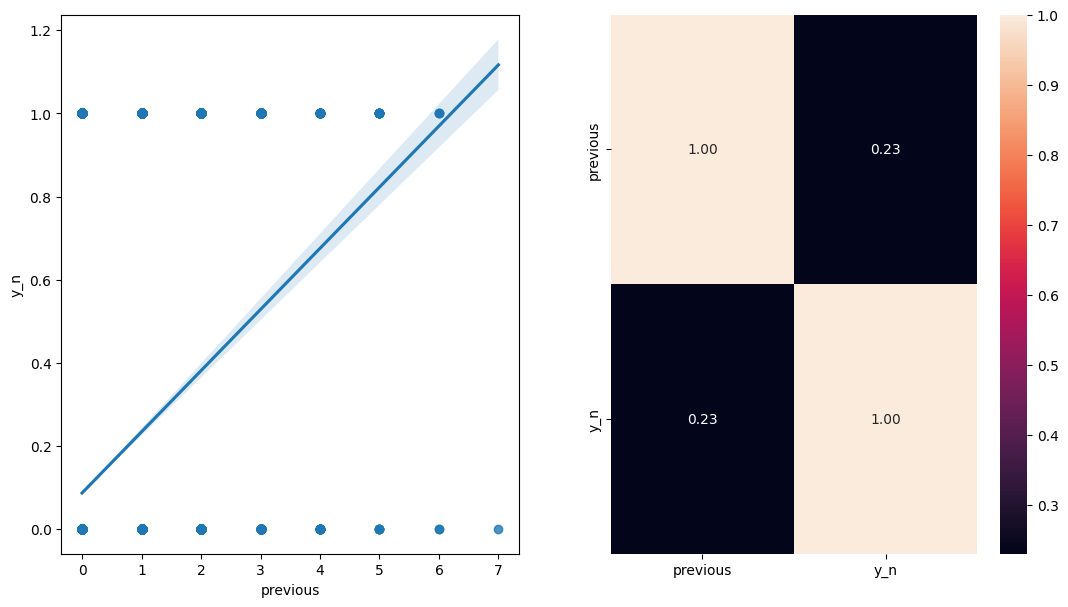

In [32]:
fig, axis = plt.subplot_mosaic([['a1','a2']], figsize = (13, 7))

data = all_numericas
x_1 = 'previous'
y_1 = 'y_n'

sns.regplot(ax = axis['a1'], data = data, x = x_1, y = y_1)
sns.heatmap(data[[x_1, y_1]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])

## 5 Feature Engineering

Split Train Test

In [33]:
#Dividimos en Train - Tests / Predictoras - Target

from sklearn.model_selection import train_test_split

target = 'y_n'

X = all_numericas.drop(target,axis=1)
y = all_numericas[target]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify=y)


Normalization

In [34]:
from sklearn.preprocessing import StandardScaler

# Guardamos las columnas
X_train_columns = X_train.columns
X_test_columns = X_test.columns

#Normalizamos las predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Guardamos los datos normalizados con sus columnas y sus indices
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_train_columns)


Save as csv

In [35]:
X_train_scaled.to_csv("../data/processed/bank_marketing_X_train.csv", index=False)
X_test_scaled.to_csv("../data/processed/bank_marketing_X_test.csv", index=False)

y_train.to_csv("../data/processed/bank_marketing_y_train.csv", index=False)
y_test.to_csv("../data/processed/bank_marketing_y_test.csv", index=False)


# My First Machine Learning

#### Prediction without SelectKBeasts and unstandarized

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)

/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

We obtained the error message due to not scaling our variables.

In [37]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Accuracy in train set: {accuracy_train}")

Accuracy in train set: 0.9080121396054628


In [38]:
from sklearn.metrics import accuracy_score

y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy in test set: {accuracy_test}")

Accuracy in test set: 0.910536537994659


After this check we see that not standarized is an error for logistic regression.

#### Prediction without Select KBest standarized

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

We show the prediction of the train set

In [40]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Accuracy in train set: {accuracy_train}")

Accuracy in train set: 0.909195751138088


Mostramos la prediccion del test

In [41]:
from sklearn.metrics import accuracy_score

y_pred_test = model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy in test set: {accuracy_test}")

Accuracy in test set: 0.9118718135469774


#### Prediccion con SelectKbests

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


accs = []
percents = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
for p in percents:
    k_best = SelectKBest(f_classif, k = int(len(X_train_scaled.columns) * p))
    k_best.fit(X_train_scaled, y_train)

    # Guardamos las columnas con su nombre y su dataframe
    ix = k_best.get_support()
    train_sel = pd.DataFrame(k_best.transform(X_train_scaled), columns = X_train_scaled.columns.values[ix])
    
    # Definir el clasificador
    model = LogisticRegression(random_state = 42)
    model.fit(train_sel, y_train)
    y_pred = model.predict(train_sel)
    acc = accuracy_score(y_train, y_pred)
    accs.append(acc)
    

best_acc = accs.index(max(accs)) 
print(f'The best k for selection is {percents[best_acc]}.')
print(f'The best accuracy we get is {round(accs[best_acc],8)}.')

print(accs)

# Guardamos el dataframe con las columnas escogidas
k_best = SelectKBest(f_classif, k = int(len(X_train_scaled.columns) * percents[best_acc]))
k_best.fit(X_train_scaled, y_train)

# Guardamos las columnas con su nombre y su dataframe
ix = k_best.get_support()
X_train_selected = pd.DataFrame(k_best.transform(X_train_scaled), columns = X_train_scaled.columns.values[ix])


The best k for selection is 0.7.
The best accuracy we get is 0.9092868.
[0.909195751138088, 0.9091047040971169, 0.9090440060698027, 0.9092867981790592, 0.9077693474962064, 0.9074658573596358]


In [43]:
# Guardamos las columnas con su nombre y su dataframe
ix = k_best.get_support()
X_test_selected = pd.DataFrame(k_best.transform(X_test_scaled), columns = X_test_scaled.columns.values[ix])


Train the model

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)
model.fit(X_train_selected, y_train)

LogisticRegression(random_state=42)

In [45]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train_selected)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Accuracy in train set: {accuracy_train}")

Accuracy in train set: 0.9092867981790592


In [46]:
from sklearn.metrics import accuracy_score

y_pred_test = model.predict(X_test_selected)
accuracy_train = accuracy_score(y_test, y_pred_test)

print(f"Accuracy in test set: {accuracy_train}")

Accuracy in test set: 0.9130857004127215


Using the SelectKBest method, we have achieved an improvement of 0.0001 on the training set.

### Model Evaluation

Training Metrics

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

# Mostrar los resultados
print(f'Accuracy: {accuracy:.8f}')
print(f'Precision: {precision:.8f}')
print(f'Recall: {recall:.8f}')
print(f'F1 Score: {f1:.8f}')


Accuracy: 0.90928680
Precision: 0.66045273
Recall: 0.40086207
F1 Score: 0.49891031


Test Metrics

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Mostrar los resultados
print(f'Accuracy: {accuracy:.8f}')
print(f'Precision: {precision:.8f}')
print(f'Recall: {recall:.8f}')
print(f'F1 Score: {f1:.8f}')


Accuracy: 0.91308570
Precision: 0.69776119
Recall: 0.40301724
F1 Score: 0.51092896


Confusion Matrix for Training

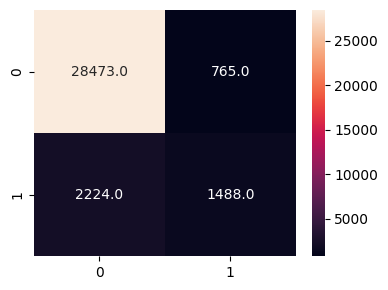

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

matrix_cm = confusion_matrix(y_train, y_pred_train)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(matrix_cm)

plt.figure(figsize = (4, 3))
sns.heatmap(cm_df, annot=True, fmt=".1f", cbar=True)

plt.tight_layout()

plt.show()

Confusion Matrix for Evaluation

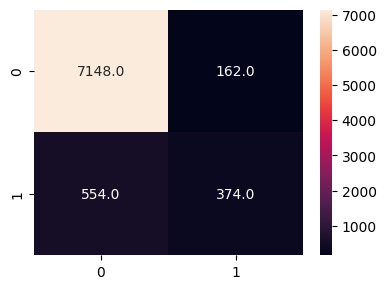

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

matrix_cm = confusion_matrix(y_test, y_pred_test)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(matrix_cm)

plt.figure(figsize = (4, 3))
sns.heatmap(cm_df, annot=True, fmt=".1f", cbar=True)

plt.tight_layout()

plt.show()

Here, we verify that the negative class (0) correctly predicted 7148 times and made 554 incorrect predictions, whereas the positive class (1) correctly predicted 374 times and made 162 incorrect predictions.

imagen de matriz de confusion 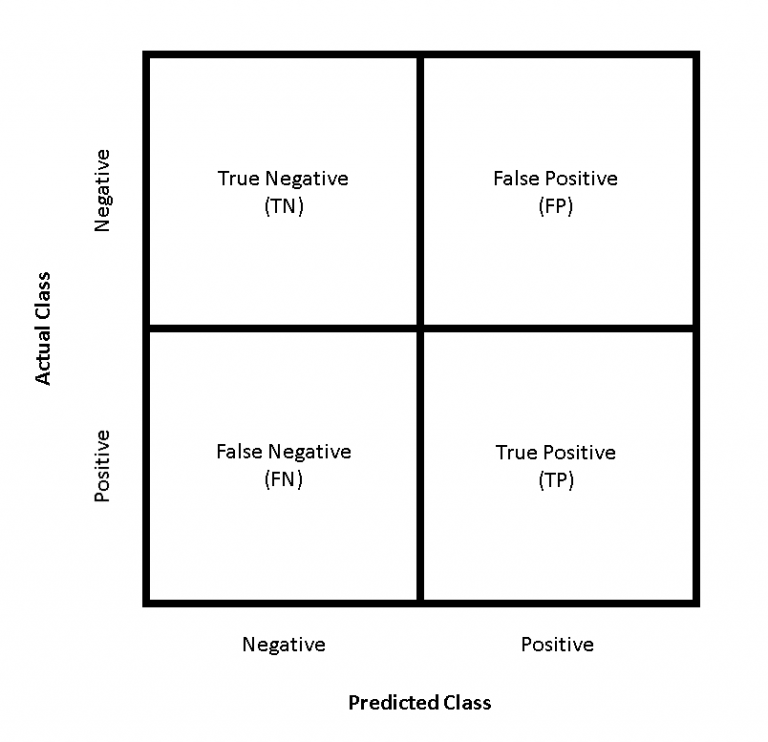

We display the ROC curve.

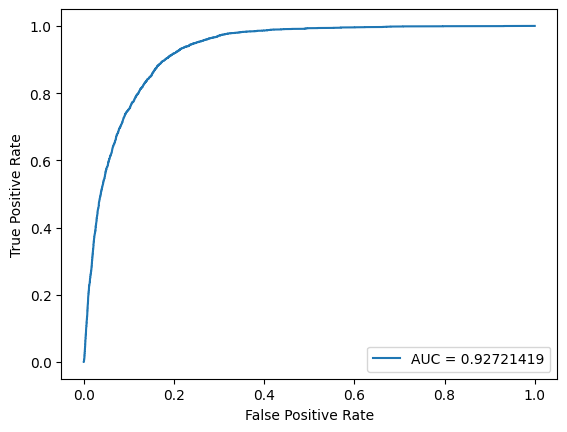

In [51]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_score_roc = model.decision_function(X_train_selected)

# Mostramos el area bajo la curva
auc = roc_auc_score(y_train, y_score_roc)

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_train, y_score_roc, pos_label=model.classes_[1])

# Crea un objeto RocCurveDisplay y visualiza la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label=f'AUC = {auc:.8f}')



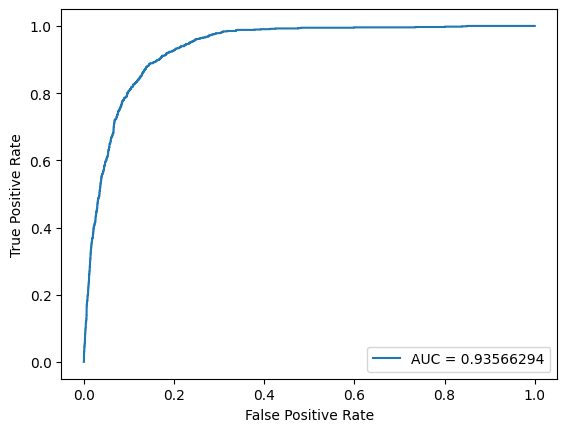

In [52]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_score_roc = model.decision_function(X_test_selected)

# Mostramos el area bajo la curva
auc = roc_auc_score(y_test, y_score_roc)

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_score_roc, pos_label=model.classes_[1])

# Crea un objeto RocCurveDisplay y visualiza la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label=f'AUC = {auc:.8f}')


### Hyperparameter Optimization


#### Using Grid Search

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42, max_iter=10000)
model.fit(X_train_selected, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [54]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "multi_class": ["auto", "ovr", "multinomial"]

}

grid = GridSearchCV(model, hyperparams, cv = 5, n_jobs=-1)
grid

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [55]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    #Entrenamos el GridSearchCV
    grid.fit(X_train_selected, y_train)

    print(f"Best hyperparameters: {grid.best_params_}")


Best hyperparameters: {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag'}


In [56]:
results_df = pd.DataFrame(grid.cv_results_)

results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_multi_class,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007631,0.001000,0.000000,0.000000,0.01,auto,l1,newton-cg,"{'C': 0.01, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'newton-cg'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,115
1,0.010539,0.003507,0.000000,0.000000,0.01,auto,l1,lbfgs,"{'C': 0.01, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,115
2,0.264561,0.035258,0.007130,0.006320,0.01,auto,l1,liblinear,"{'C': 0.01, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}",0.906980,0.909256,0.900607,0.909256,0.907891,0.906798,0.003214,113
3,0.005954,0.002755,0.000000,0.000000,0.01,auto,l1,sag,"{'C': 0.01, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,115
4,0.397929,0.089596,0.004799,0.001072,0.01,auto,l1,saga,"{'C': 0.01, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}",0.906525,0.909863,0.901366,0.909105,0.907436,0.906859,0.002990,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.003863,0.001236,0.000000,0.000000,1000,multinomial,elasticnet,newton-cg,"{'C': 1000, 'multi_class': 'multinomial', 'penalty': 'elasticnet', 'solver': 'newton-cg'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,115
266,0.003815,0.000537,0.000000,0.000000,1000,multinomial,elasticnet,lbfgs,"{'C': 1000, 'multi_class': 'multinomial', 'penalty': 'elasticnet', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,115
267,0.003950,0.000524,0.000000,0.000000,1000,multinomial,elasticnet,liblinear,"{'C': 1000, 'multi_class': 'multinomial', 'penalty': 'elasticnet', 'solver': 'liblinear'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,115
268,0.003731,0.000185,0.000000,0.000000,1000,multinomial,elasticnet,sag,"{'C': 1000, 'multi_class': 'multinomial', 'penalty': 'elasticnet', 'solver': 'sag'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,115


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression(random_state = 42, **grid.best_params_)
model.fit(X_train_selected, y_train)

y_pred_train = model.predict(X_train_selected)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Precision on the training set with grid search: {accuracy_train}")

from sklearn.metrics import accuracy_score

y_pred_test = model.predict(X_test_selected)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Precision on the validation set with grid search: {accuracy_test}")

Precision on the training set with grid search: 0.9090440060698027
Precision on the validation set with grid search: 0.9128429230395727


We save our optimized model.

In [58]:
import pickle

ruta_guardado = '../models/modelo.pkl'

with open(ruta_guardado, 'wb') as archivo:
    pickle.dump(model, archivo)

#### Using Random Search

In [59]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


hyperparams = {
    "C": [0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "multi_class": ["auto", "ovr", "multinomial"],


}

random_search = RandomizedSearchCV(model, hyperparams, n_iter=200, cv = 5, n_jobs=-1, random_state=42)
random_search

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(C=0.1, random_state=42,
                                                solver='sag'),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42)

In [60]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    #Entrenamos el GridSearchCV
    random_search.fit(X_train_selected, y_train)

    print(f"Best hyperparameters: {grid.best_params_}")


Best hyperparameters: {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag'}


In [61]:
results_df = pd.DataFrame(random_search.cv_results_)

results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_penalty,param_multi_class,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002963,0.000095,0.000000,0.000000,newton-cg,l1,multinomial,0.01,"{'solver': 'newton-cg', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.01}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
1,0.003139,0.000351,0.000000,0.000000,lbfgs,elasticnet,ovr,1,"{'solver': 'lbfgs', 'penalty': 'elasticnet', 'multi_class': 'ovr', 'C': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
2,0.635378,0.137525,0.004084,0.001603,saga,l1,multinomial,0.1,"{'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.1}",0.908953,0.912291,0.903338,0.911229,0.910015,0.909165,0.003123,10
3,0.006819,0.000843,0.000000,0.000000,liblinear,l2,multinomial,1,"{'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
4,0.003417,0.000246,0.000000,0.000000,lbfgs,l1,ovr,100,"{'solver': 'lbfgs', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 100}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.003681,0.000360,0.000000,0.000000,lbfgs,l1,multinomial,100,"{'solver': 'lbfgs', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 100}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
196,0.003784,0.000343,0.000000,0.000000,sag,l1,auto,0.01,"{'solver': 'sag', 'penalty': 'l1', 'multi_class': 'auto', 'C': 0.01}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
197,0.004082,0.000250,0.000000,0.000000,newton-cg,l1,ovr,1,"{'solver': 'newton-cg', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
198,0.286429,0.017618,0.002236,0.000407,sag,l2,auto,0.1,"{'solver': 'sag', 'penalty': 'l2', 'multi_class': 'auto', 'C': 0.1}",0.909256,0.912595,0.903642,0.911229,0.910167,0.909378,0.003076,1


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression(random_state = 42, **random_search.best_params_)
model.fit(X_train_selected, y_train)

y_pred_train = model.predict(X_train_selected)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Precision on the training set with random search: {accuracy_train}")

from sklearn.metrics import accuracy_score

y_pred_test = model.predict(X_test_selected)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Precision on the validation set with random search: {accuracy_test}")

Precision on the training set with random search: 0.9090440060698027
Precision on the validation set with random search: 0.9128429230395727


We have learned to split the data into training and test sets, select the best features, save our model, evaluate it using various metrics, and optimize it with hyperparameters.